In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/mwalton/anaconda2/envs/ktt/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.layers.core import Activation
from keras.activations import relu
from keras.models import Sequential, Graph, Model
from convauto.layers import UnPool2D, ConvolutionalTranspose2D
from convauto.datasets import MNIST, STL10
from convauto.objectives import l2_loss
import matplotlib.pyplot as plt

Using TensorFlow backend.


## MNIST Test

In [3]:
# load mnist
(X_train, y_train), (X_test, y_test) = MNIST.load_mnist()

In [4]:
ex1 = Sequential()
conv0 = Convolution2D(16,5,5, border_mode='same',
                     activation='relu', input_shape=[1,28,28])
ex1.add(conv0)
maxpool0 = MaxPooling2D(border_mode='same')
ex1.add(maxpool0)
ex1.add(UnPool2D(maxpool0))
ex1.add(ConvolutionalTranspose2D(conv0))

ex1.compile(optimizer='rmsprop', loss=l2_loss)
ex1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 16, 28, 28)    416         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 14, 14)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
unpool2d_1 (UnPool2D)            (None, 16, 28, 28)    0           maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
convolutionaltranspose2d_1 (Convo(None, 1, 28, 28)     0           unpool2d_1[0][0]                 
Total params: 416
_________________________________________________________________________

In [5]:
ex1.fit(X_train, X_train, nb_epoch=1)

Epoch 1/1
60000/60000 [==============================] - 107s - loss: 29.5567   


[autoreload of convauto.backend.tensorflow_backend failed: Traceback (most recent call last):
  File "/Users/mwalton/anaconda2/envs/ktt/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
KeyError: "Registering two gradient with name 'MaxPoolGrad' !(Previous registration was in <module> /Users/mwalton/anaconda2/envs/ktt/lib/python2.7/site-packages/ipykernel/__main__.py:3)"
]


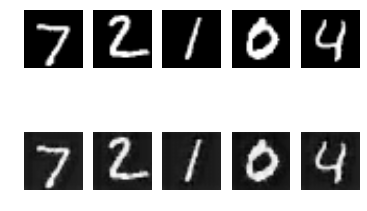

In [6]:
x_hat = ex1.predict(X_test)

for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap='Greys_r')
    plt.axis('off')
    plt.subplot(2,5,i+6)
    plt.imshow(x_hat[i].reshape((28,28)),cmap='Greys_r')
    plt.axis('off')

## STL10

In [ ]:
unlabeled = STL10.load_unlabeled()

## Joint Loss

In [4]:
input_img = Input(shape=[1,28,28])

conv = Convolution2D(16,5,5, border_mode='same', activation='relu')
c = conv(input_img)
maxpool = MaxPooling2D(border_mode='same')
mp = maxpool(c)
unpool = UnPool2D(maxpool)
up = unpool(mp)
convT = ConvolutionalTranspose2D(conv)
ct = convT(up)

swwae = Model(input_img, ct)
swwae.compile(optimizer='rmsprop', loss=l2_loss)
swwae.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 16, 28, 28)    416         input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 14, 14)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
unpool2d_1 (UnPool2D)            (None, 16, 28, 28)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________